In [283]:
import pandas as pd
data = pd.read_csv("BostonHousing.csv")

data = data.dropna()

head = data.columns.tolist()
print(head)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


<Axes: >

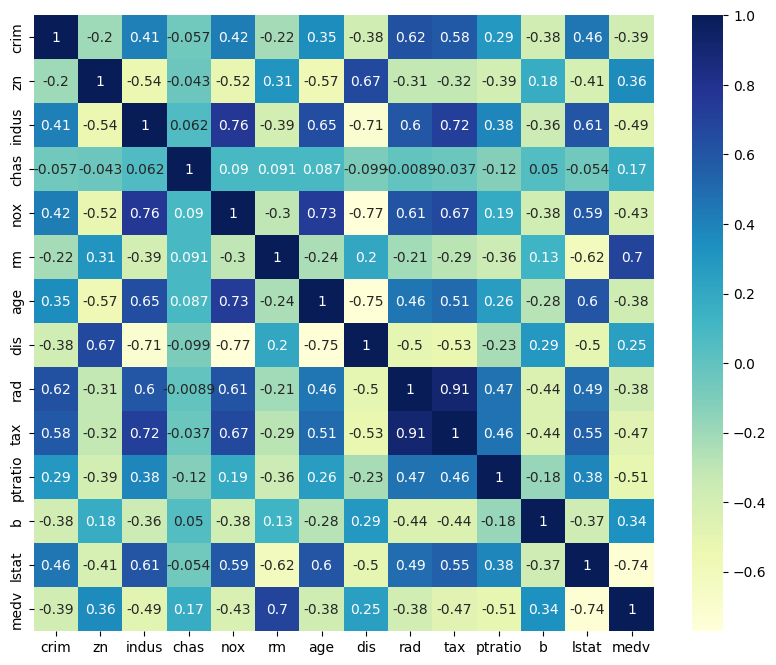

In [292]:
import seaborn as sns 
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [285]:
x = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = data["medv"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [308]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(x,y,test_size=0.1,random_state=42)

imputer = SimpleImputer(strategy='mean')
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)


In [309]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
model.fit(xtrain,ytrain)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [310]:
ypred = model.predict(xtest)

In [311]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Squared Error (MSE)
mse = mean_squared_error(ytest, ypred)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, ypred)
# R² Score
r2 = r2_score(ytest, ypred)
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

avg_price = ytest.mean()
error_percent = (rmse / avg_price) * 100
print(f"Error %: {error_percent:.2f}%")


MSE : 6.124486625071294
RMSE: 2.4747700145814147
MAE : 1.9587611544514623
R²  : 0.8927995638182753
Error %: 12.29%


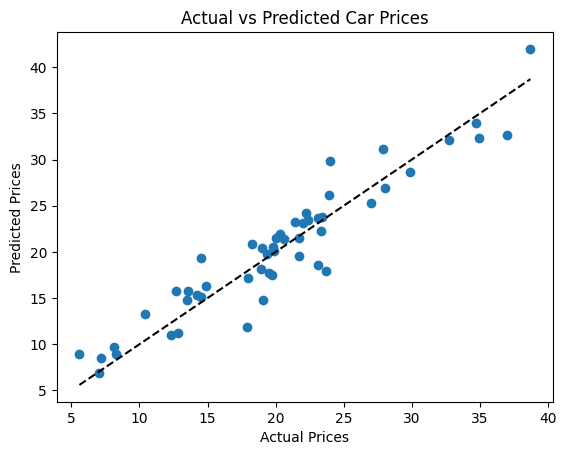

In [312]:
plt.scatter(ytest, ypred)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='black', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()